In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn import linear_model
import seaborn as sns

In [34]:
!pip install catboost

     |████████████████████████████████| 66.2MB 67kB/s 


In [2]:
from catboost import CatBoostRegressor

In [2]:
df = pd.read_csv('data/res_df.csv')

In [3]:
df.head()

,Porosity,Resistivity,Water_Saturation
0,0.12529,6.52,1.0
1,0.14511,6.52,1.0
2,0.14511,6.52,1.0
3,0.13481,8.00,1.0
4,0.13481,8.00,1.0


In [5]:
X = df.drop(['Water_Saturation'],axis=1)
Y = df['Water_Saturation']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2,random_state=77)

Base model

In [ ]:
clf_bag = BaggingRegressor(base_estimator=SVR(),n_estimators=10,random_state=77).fit(X_train,y_train)

In [29]:
pred_bag = clf_bag.predict(X_test)

In [31]:
mean_squared_error(y_test, pred_bag)

0.08651632501747329

CatBoost Model.

In [58]:
cr = CatBoostRegressor(iterations=2000, learning_rate=0.15, depth=12, random_seed=77, loss_function='RMSE', eval_metric='RMSE')

In [59]:
np.mean(cross_val_score(cr, X_test, y_test, cv=3, scoring='r2'))

Streaming output truncated to the last 5000 lines.
1001:	learn: 0.1994002	total: 40.8s	remaining: 40.6s
1002:	learn: 0.1993626	total: 40.8s	remaining: 40.6s
1003:	learn: 0.1993414	total: 40.8s	remaining: 40.5s
1004:	learn: 0.1993067	total: 40.9s	remaining: 40.5s
1005:	learn: 0.1992947	total: 40.9s	remaining: 40.4s
1006:	learn: 0.1992624	total: 41s	remaining: 40.4s
1007:	learn: 0.1992534	total: 41s	remaining: 40.4s
1008:	learn: 0.1992049	total: 41s	remaining: 40.3s
1009:	learn: 0.1991708	total: 41.1s	remaining: 40.3s
1010:	learn: 0.1991444	total: 41.1s	remaining: 40.2s
1011:	learn: 0.1990990	total: 41.2s	remaining: 40.2s
1012:	learn: 0.1990831	total: 41.2s	remaining: 40.1s
1013:	learn: 0.1990514	total: 41.2s	remaining: 40.1s
1014:	learn: 0.1990238	total: 41.3s	remaining: 40.1s
1015:	learn: 0.1989989	total: 41.3s	remaining: 40s
1016:	learn: 0.1989670	total: 41.4s	remaining: 40s
1017:	learn: 0.1989449	total: 41.4s	remaining: 39.9s
1018:	learn: 0.1989139	total: 41.4s	remaining: 39.9s
1019:

0.22267577167713307

In [60]:
cr.fit(X_train,y_train)

0:	learn: 0.2859903	total: 58.9ms	remaining: 1m 57s
1:	learn: 0.2810082	total: 116ms	remaining: 1m 56s
2:	learn: 0.2772233	total: 176ms	remaining: 1m 57s
3:	learn: 0.2744128	total: 233ms	remaining: 1m 56s
4:	learn: 0.2722521	total: 296ms	remaining: 1m 58s
5:	learn: 0.2707371	total: 354ms	remaining: 1m 57s
6:	learn: 0.2695693	total: 419ms	remaining: 1m 59s
7:	learn: 0.2686230	total: 481ms	remaining: 1m 59s
8:	learn: 0.2678077	total: 565ms	remaining: 2m 4s
9:	learn: 0.2672301	total: 630ms	remaining: 2m 5s
10:	learn: 0.2667218	total: 706ms	remaining: 2m 7s
11:	learn: 0.2662859	total: 764ms	remaining: 2m 6s
12:	learn: 0.2658868	total: 828ms	remaining: 2m 6s
13:	learn: 0.2656007	total: 886ms	remaining: 2m 5s
14:	learn: 0.2653430	total: 945ms	remaining: 2m 5s
15:	learn: 0.2650614	total: 1s	remaining: 2m 4s
16:	learn: 0.2648533	total: 1.08s	remaining: 2m 6s
17:	learn: 0.2646347	total: 1.15s	remaining: 2m 6s
18:	learn: 0.2644015	total: 1.21s	remaining: 2m 5s
19:	learn: 0.2642190	total: 1.27s	r

In [61]:
pred_cat = cr.predict(X_test)
mean_squared_error(y_test, pred_cat)

0.05520735721922619

XGB Models

In [137]:
xgb_reg = linear_model.LinearRegression(XGBRegressor(colsample_bytree=0.8,eval_metric='mse',
                                            gamma=0.1, learning_rate=0.1,max_depth=100,
                                            min_child_weight=2,n_estimators=100,nthread=4,
                                            objective='reg.squarederror', scale_pos_weight=1,seed=77,
                                            subsample=0.8, random_state=77))



In [138]:
xgb_reg.fit(X_train,y_train)

LinearRegression(copy_X=True,
                 fit_intercept=XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.8,
                                            eval_metric='mse', gamma=0.1,
                                            importance_type='gain',
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=100, min_child_weight=2,
                                            missing=None, n_estimators=100,
                                            n_jobs=1, nthread=4,
                                            objective='reg.squarederror',
                                            random_state=77, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                            

In [139]:
pred_xgb = xgb_reg.predict(X_test)
mean_squared_error(y_test, pred_xgb)

0.07656015918098134

### Data Exploration

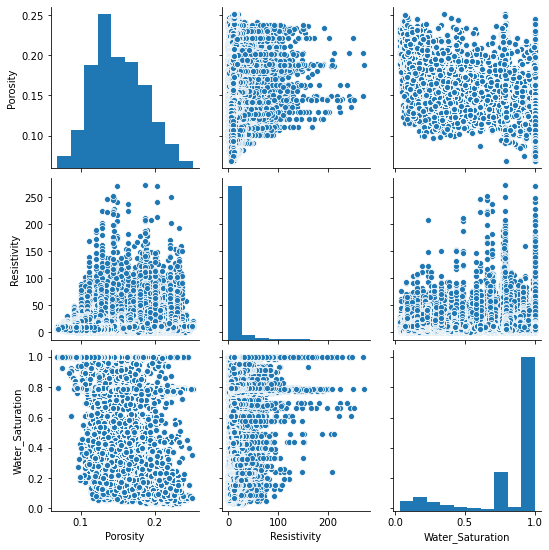

In [8]:
sns.pairplot(df)

<AxesSubplot:xlabel='Porosity'>

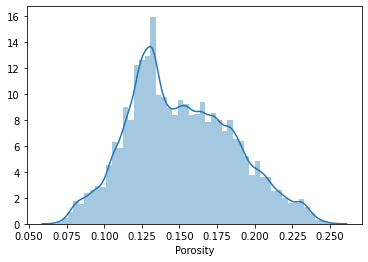

In [10]:
sns.distplot(df['Porosity'])

<AxesSubplot:xlabel='Resistivity'>

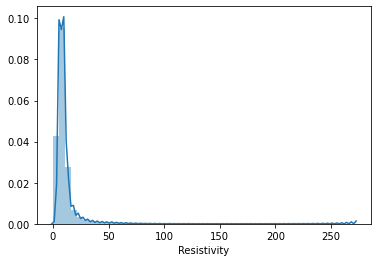

In [11]:
sns.distplot(df['Resistivity'])

<AxesSubplot:xlabel='Water_Saturation'>

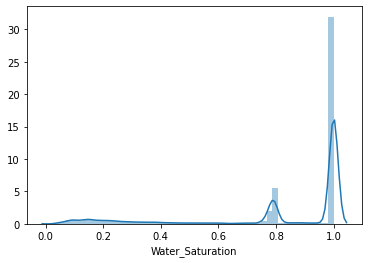

In [12]:
sns.distplot(df['Water_Saturation'])

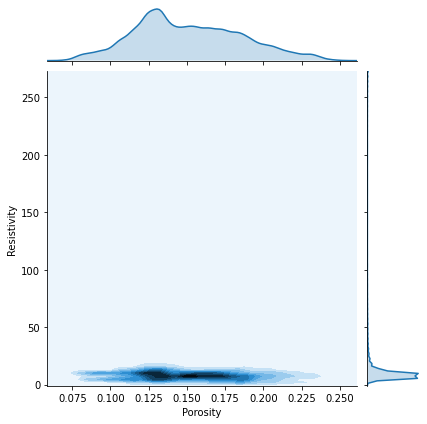

In [13]:
sns.jointplot(x=df['Porosity'], y=df['Resistivity'], kind='kde')

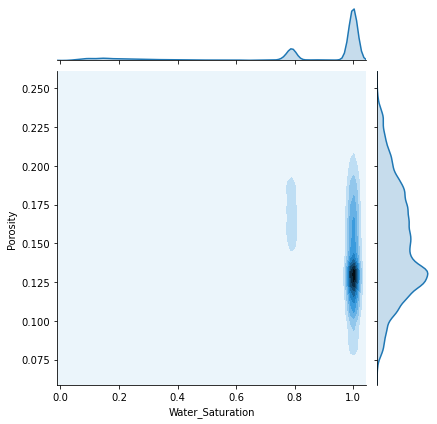

In [14]:
sns.jointplot(x=df['Water_Saturation'], y=df['Porosity'], kind='kde')

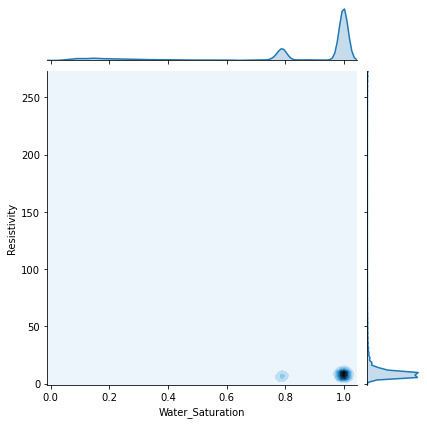

In [15]:
sns.jointplot(x=df['Water_Saturation'], y=df['Resistivity'], kind='kde')